# 1. 데이터 전처리

In [174]:
# 필요모듈 가져오기
import numpy as np
import pandas as pd 
import csv
import json

# 데이터 추출
country = pd.read_csv('./data/국적별구.csv')
age = pd.read_csv('./data/연령별구.csv')
purpose = pd.read_csv('./data/체류자격별구.csv')
age_dong = pd.read_csv('./data/연령별동.csv')

# GeoJson파일
dong_geo = './data/seoul-dong_win.geojson'
dong_geo = json.load(open(dong_geo))  # 동
geo_str = './data/skorea_municipalities_geo_simple.json'
gu_geo = json.load(open(geo_str, encoding='utf-8')) # 구

# 지하철 노선 위경도
json_str = './data/subway_data.json'
subway = json.load(open(json_str, encoding='utf-8')) # 서브웨이 데이터

# 동 좌표, 외국인 인구 유형
opp = pd.read_csv('./data/동좌표.csv', encoding='euc-kr')
people = pd.read_csv('./data/외국인인구유형.csv', encoding='utf-8')

### 데이터 가져오기 및 정리

In [175]:
# 국적별 구 데이터 전처리
country = country.iloc[1:,1:]
cols_to_drop = [col for col in country.columns if '계' in country[col].values]
country = country.drop(cols_to_drop, axis=1)
country = country.replace('-', 0)
new_columns = ['연도', '국적', '성', '인원수', '자치구']
country_2020 = country.filter(regex='2020').T.reset_index(drop=False)
country_2021 = country.filter(regex='2021').T.reset_index(drop=False)
country_2022 = country.filter(regex='2022').T.reset_index(drop=False)
country_2023 = country.filter(regex='2023').T.reset_index(drop=False)
country_2020['index'] = 2020
country_2021['index'] = 2021
country_2022['index'] = 2022
country_2023['index'] = 2023
region = country['자치구별(2)'][2:]
region = region.reset_index(drop=True)
# 2023년도 데이터 활용 (복붙 및 변수명 연도만 바꾸면 여러 연도 데이터 활용 가능)
country_current = pd.DataFrame()
for i in range(3, 28):
    df = country_2023.loc[:, ['index',1,2,i]]
    df['자치구'] = region[i-3]
    df.columns = new_columns
    country_current = pd.concat([country_current, df])
country_current = country_current[['연도', '자치구', '성', '국적', '인원수']]
country_current['인원수'] = country_current['인원수'].astype('int64')

# 체류자격별 구 데이터 전처리
purpose.drop(2, inplace=True)
purpose = purpose.iloc[1:,1:]
purpose = purpose.replace('-', 0)
new_columns = ['연도', '체류자격', '성', '인원수', '자치구']
region = purpose['자치구별(2)'][2:].reset_index(drop=True)
purpose_2020 = purpose.filter(regex='2020').T.reset_index(drop=False)
purpose_2021 = purpose.filter(regex='2021').T.reset_index(drop=False)
purpose_2022 = purpose.filter(regex='2022').T.reset_index(drop=False)
purpose_2023 = purpose.filter(regex='2023').T.reset_index(drop=False)
purpose_2020['index'] = 2020
purpose_2021['index'] = 2021
purpose_2022['index'] = 2022
purpose_2023['index'] = 2023
string = ['연도', '체류자격', '성']
string.extend(np.arange(25))
purpose_2020.columns = string
purpose_2021.columns = string
purpose_2022.columns = string
purpose_2023.columns = string
# 2023년도 데이터 활용 (복붙 및 변수명 연도만 바꾸면 여러 연도 데이터 활용 가능)
purpose = pd.DataFrame()
for i in range(25):
    df = purpose_2020.loc[:, ['연도','체류자격','성', i]]
    df['자치구'] = region[i]
    df.columns = new_columns
    purpose = pd.concat([purpose, df])
for i in range(25):
    df = purpose_2021.loc[:, ['연도','체류자격','성', i]]
    df['자치구'] = region[i]
    df.columns = new_columns
    purpose = pd.concat([purpose, df])
for i in range(25):
    df = purpose_2022.loc[:, ['연도','체류자격','성', i]]
    df['자치구'] = region[i]
    df.columns = new_columns
    purpose = pd.concat([purpose, df])
for i in range(25):
    df = purpose_2023.loc[:, ['연도','체류자격','성', i]]
    df['자치구'] = region[i]
    df.columns = new_columns
    purpose = pd.concat([purpose, df])
purpose = purpose[['연도', '자치구', '성', '체류자격', '인원수']]
purpose['인원수'] = purpose['인원수'].astype('int64')
purpose_current = purpose.query('연도 == 2023')

# 연령별 구 데이터 전처리
age.drop(age.index[1:4], inplace=True)
age.drop(age[age['항목']=='계'].index, inplace=True)
cols_to_drop = [col for col in age.columns if '계' in age[col].values]
age = age.drop(cols_to_drop, axis=1)
age = age.replace('-', 0)
age_2020 = age.filter(regex='2020').T.reset_index(drop=False)
age_2021 = age.filter(regex='2021').T.reset_index(drop=False)
age_2022 = age.filter(regex='2022').T.reset_index(drop=False)
age_2023 = age.filter(regex='2023').T.reset_index(drop=False)
age_2020['index'] = 2020
age_2021['index'] = 2021
age_2022['index'] = 2022
age_2023['index'] = 2023
region = age['동별(1)'][1:].reset_index(drop=True)
new_columns = ['연도', '나이', '인원수', '자치구', '성']
string = ['연도', '나이']
string.extend(np.arange(50))
age_2020.columns = string
age_2021.columns = string
age_2022.columns = string
age_2023.columns = string
age = pd.DataFrame()
for i in range(0, 50, 2): # 2020년도. 짝수는 남성 / 홀수는 여성
    df = age_2020.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '남자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(1, 51, 2):
    df = age_2020.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '여자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(0, 50, 2): # 2021년도
    df = age_2021.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '남자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(1, 51, 2):
    df = age_2021.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '여자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(0, 50, 2): # 2022년도
    df = age_2022.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '남자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(1, 51, 2):
    df = age_2022.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '여자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(0, 50, 2): # 2023년도
    df = age_2023.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '남자'
    df.columns = new_columns
    age = pd.concat([age, df])
for i in range(1, 51, 2):
    df = age_2023.loc[:, ['연도','나이',i]]
    df['자치구'] = region[i]
    df['성'] = '여자'
    df.columns = new_columns
    age = pd.concat([age, df])
age = age[['연도', '자치구', '성', '나이', '인원수']]
age['인원수'] = age['인원수'].astype('int64')

# 동별 데이터 가져오기
age_dong = age_dong[['시점', '동별' ,'연령별' ,'남자' ,'여자']]
def only_year(data):
    return data[:4]
age_dong['시점'] = age_dong['시점'].apply(only_year)
age_dong['인원수'] = age_dong['남자']+age_dong['여자']

### 그래프 활용 목적 전처리

In [162]:
# 상위 10개국가 데이터 활용
country_2023 = country_current.query('연도 == 2023')
country_count = country_2023.groupby('국적')['인원수'].sum().reset_index()
# display(country_count.sort_values('인원수', ascending=False).nlargest(10, '인원수')) # 인원수 상위 국가 10

# 기타 인원에 3300명 아래의 국가들을 모두 합함
etc = country_count[country_count['인원수']<3300]['인원수'].sum()
country_count.iloc[1, 1] = country_count.iloc[1, 1] + etc
country_top10 = country_count.nlargest(10, '인원수') # 3300명 아래부터 11등..

# 주요 체류자격별 인원수 연도에 따른 추이를 나타내는 그래프를 위한 데이터
purpose_sex_population = purpose.groupby(['연도', '체류자격', '성'])['인원수'].sum().reset_index()
purpose_sex_population = purpose_sex_population[(purpose_sex_population['체류자격']=='결혼이민(F6)')
                                          |(purpose_sex_population['체류자격']=='유학(D2)')
                                          |(purpose_sex_population['체류자격']=='방문취업(H2)')]

### 지도 활용 목적 전처리

In [111]:
# 자치구별 인원수 데이터프레임
gu_population = country_current.groupby('자치구')['인원수'].sum().reset_index()
# 동별 인원수 데이터프레임
dong_population = age_dong.groupby('동별')['인원수'].sum().reset_index()

foreigner_center = pd.read_csv('./data/외국인지원시설(위경도).csv')
foreigner_center = foreigner_center[['센터명', '위치', '위도', '경도']]

# 서울동 좌표, 인구수
dong_coor = opp.iloc[:425, 1:]
dong_info = dong_coor.merge(dong_population, left_on='읍면동', right_on='동별')
# 외국인 인구가 많은 7개구의 좌표
dong_top7 = dong_info.query("시군구.str.contains('용산구|구로구|영등포구|동대문구|서대문구|관악구|광진구')")
dong_top7 = dong_top7.drop('동별', axis=1)
dong_top7['인원수'] = pd.to_numeric(dong_top7['인원수'])
dongdaemoon = dong_top7[dong_top7['시군구']=='동대문구']
yongsan = dong_top7[dong_top7['시군구']=='용산구']
yeongdeungpo = dong_top7[dong_top7['시군구']=='영등포구']
gwanak = dong_top7[dong_top7['시군구']=='관악구']
guro = dong_top7[dong_top7['시군구']=='구로구']
seodaemun = dong_top7[dong_top7['시군구']=='서대문구']
gwangjin = dong_top7[dong_top7['시군구']=='광진구']

# 2. 데이터 그래프 그리기

In [112]:
# 그리기 모듈
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

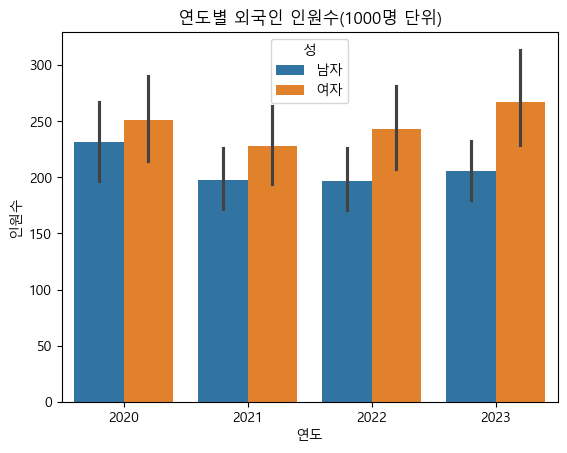

In [113]:
# 연도별 국내 외국인 인원수 (Bar)
sns.barplot(age, x='연도', y='인원수', hue='성')
sns.set
plt.title('연도별 외국인 인원수(1000명 단위)')
plt.show()

In [114]:
# 국내 국적별 외국인 인구 비율 그래프(Pie)
fig = px.pie(country_top10, values=country_top10['인원수'], names=country_top10['국적'], title='외국인 국가별 비율(%)')
fig.update_traces(textinfo = 'label+percent',
                  textfont_size = 10,
                  textposition = 'auto')
fig.update_layout(width=800, height=600)
fig.show()

<Axes: xlabel='체류자격', ylabel='인원수'>

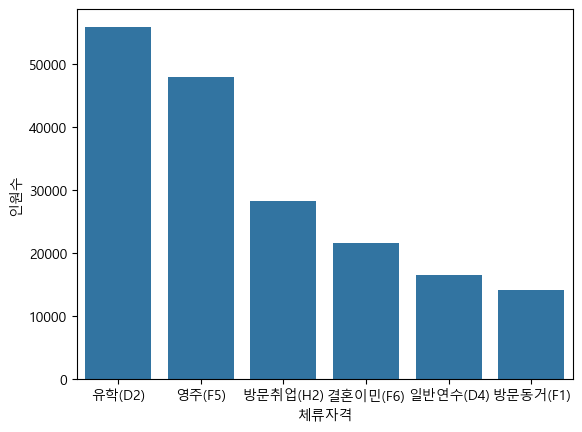

In [117]:
# 체류자격 별 인원수 그래프 (Bar)
purpose_population = purpose_current.groupby('체류자격')['인원수'].sum().reset_index()
purpose_top6 = purpose_population.nlargest(6, '인원수')
sns.barplot(purpose_top6, x='체류자격', y='인원수')

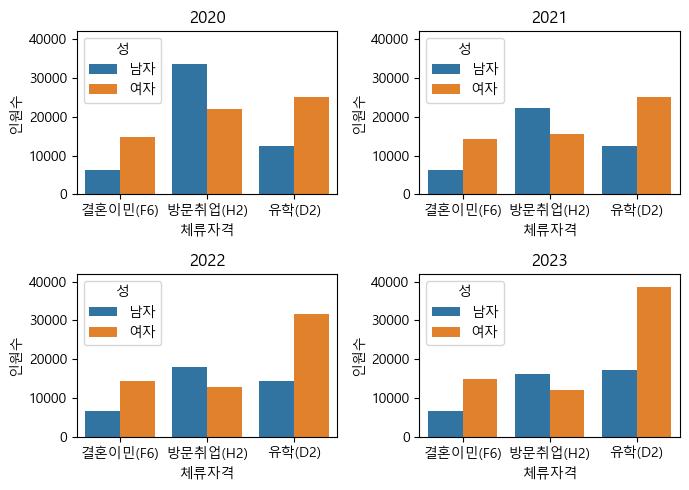

In [161]:
plt.figure(figsize=(7,5))
for i in range(2020, 2024):
    plt.subplot(2, 2, i-2019)
    sns.barplot(purpose_sex_population.query(f'연도 == {i}'), x='체류자격' , y='인원수', hue='성')
    plt.title(i)
    plt.ylim(0, 42000)
plt.tight_layout()
plt.show()

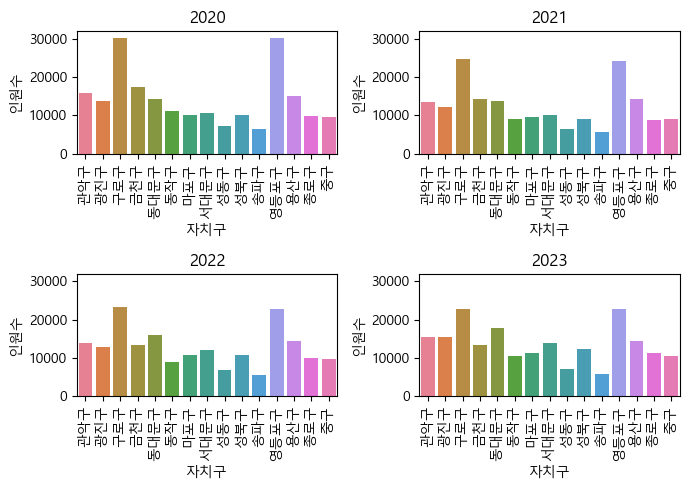

In [255]:
gu_population = age.groupby(['연도', '자치구'])['인원수'].sum().reset_index()
gu_top = gu_population.groupby('자치구')['인원수'].sum().reset_index().sort_values('인원수', ascending=False)
gu_drop = gu_top['자치구'].values[15:]
for drop in gu_drop:
    gu_population = gu_population[gu_population['자치구']!=drop]
plt.figure(figsize=(7,5))
for i in range(2020, 2024):
    plt.subplot(2, 2, i-2019)
    sns.barplot(gu_population.query(f'연도 == {i}'), x='자치구' , y='인원수', hue='자치구')
    plt.title(i)
    plt.ylim(0, 32000)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


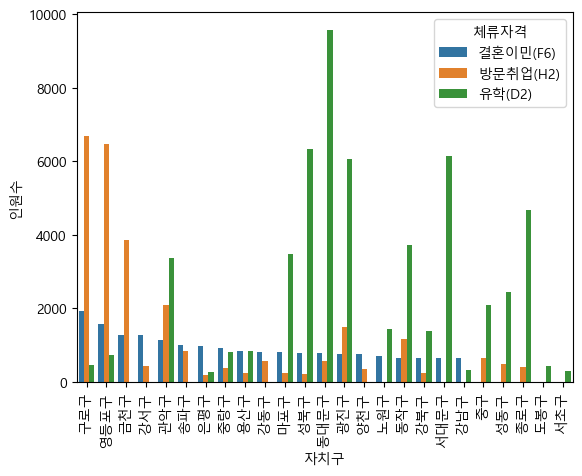

In [55]:
# 체류목적에 따른 외국인 거주지 분석
purpose_filter = ['유학(D2)', '방문취업(H2)', '결혼이민(F6)']
filtered_data = purpose_current[purpose_current['체류자격'].isin(purpose_filter)]
purpose_population = filtered_data.groupby(['체류자격', '자치구'])['인원수'].sum().reset_index()
purpose_top8 = purpose_population.groupby('체류자격').apply(lambda x: x.nlargest(20, '인원수')).reset_index(drop=True)
sns.barplot(purpose_top8, x='자치구', y='인원수', hue='체류자격')
plt.xticks(rotation=90)
plt.show()

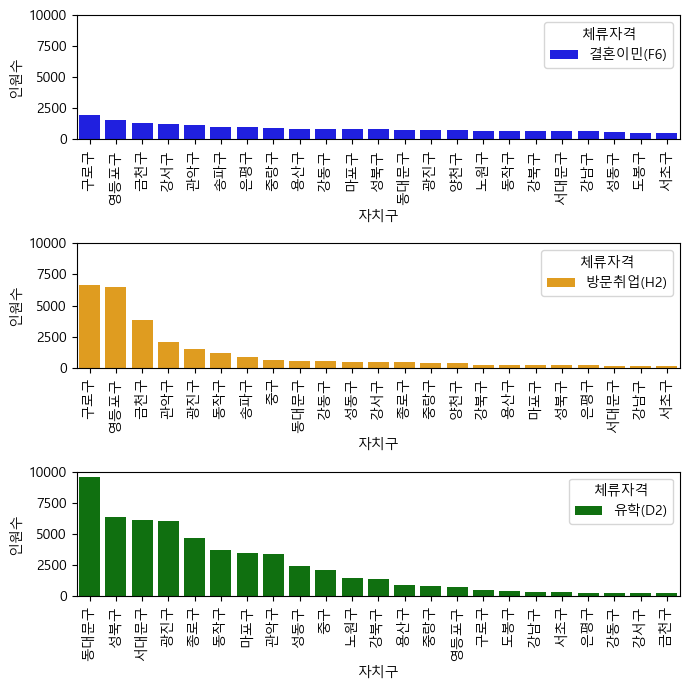

In [66]:
plt.figure(figsize=(7, 7))
purpose_filter = ['결혼이민(F6)', '방문취업(H2)', '유학(D2)']
bar_color = ['blue', 'orange', 'green']
for i in range(3):
    plt.subplot(3, 1, i+1)
    filtered_data = purpose_current[purpose_current['체류자격'].isin([purpose_filter[i]])]
    purpose_population = filtered_data.groupby(['체류자격', '자치구'])['인원수'].sum().reset_index()
    purpose_all = purpose_population.groupby('체류자격').apply(lambda x: x.nlargest(23, '인원수')).reset_index(drop=True)
    sns.barplot(data=purpose_all, x='자치구', y='인원수', hue='체류자격', palette=[bar_color[i]])
    plt.ylim(0, 10000)
    plt.xticks(rotation=90)
    plt.xlabel('자치구')
plt.tight_layout()
plt.show()

# 3. 데이터 지도 그리기

In [ ]:
import plotly.io as pio

### 구 단위 외국인 분포 및 수

In [165]:
center = [37.541, 126.986] 
# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 map을 만듦 
map = folium.Map(location=center, zoom_start=11) 

# Choropleth 레이어를 만들고, 맵 m에 추가
choropleth_layer = folium.Choropleth( geo_data=dong_geo, data=dong_population, columns=('동별', '인원수'), 
                   key_on='feature.properties.동', 
                   fill_color='YlGnBu', 
                   legend_name='외국인 거주 수' ).add_to(map)
region_data = dong_population.set_index('동별')
region_data = region_data.astype('object')
# geojson내에 인원수 정보 추가 후 툴팁 추가 (채)
for feature in choropleth_layer.geojson.data['features']:
    feature['properties']['인원수'] = region_data.loc[feature['properties']['동'], '인원수']
folium.GeoJsonTooltip(['구','동', '인원수']).add_to(choropleth_layer.geojson)
folium.LayerControl().add_to(map)
# 각 지리적 피처에 마우스를 가져가면 툴팁에 구, 인원수 표시됨
map

### 인구밀집 지역 지하철 노선 / 외국인 지원시설 현황

In [166]:
map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
# 인구밀집도 표현
choropleth_layer = folium.Choropleth( geo_data=dong_geo, data=dong_population, columns=('동별', '인원수'), 
                   key_on='feature.properties.동', 
                   fill_color='Set3', 
                   legend_name='외국인 거주 수',  fill_opacity=0.5, line_opacity=0.7).add_to(map)

# 서울 지하철 노선 위치 현황
for station_name, coordinates in subway.items():
    folium.CircleMarker(location=coordinates, popup=station_name, radius=2, color='blue', opacity=0.7).add_to(choropleth_layer)

# 외국인 지원시설 위치 현황
for i in foreigner_center.index:
    name = foreigner_center.loc[i, '센터명']
    lat = foreigner_center.loc[i, '위도']
    lng = foreigner_center.loc[i, '경도']
    marker= folium.Marker([lat,lng], popup=name,icon=folium.Icon(color='blue')).add_to(choropleth_layer)
tooltip = folium.features.GeoJsonTooltip(fields=['구','동'], labels=True, sticky=True)
choropleth_layer.geojson.add_child(tooltip)
map

### 가장 인구가 많은 7개 구의 동별 인구 분포

In [167]:
# Folium 지도 만들기
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
# Plotly의 scatter mapbox 그림 만들기
fig = px.scatter_mapbox(
    dongdaemoon, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='동대문구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
# 지도 표시
fig.show()

In [ ]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
fig = px.scatter_mapbox(
    yongsan, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='용산구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
fig = px.scatter_mapbox(
    yeongdeungpo, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='영등포구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
fig = px.scatter_mapbox(
    gwanak, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='관악구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
fig = px.scatter_mapbox(
    guro, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='구로구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
fig = px.scatter_mapbox(
    seodaemun, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='서대문구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
fig.show()

In [ ]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
fig = px.scatter_mapbox(
    gwangjin, lat='위도', lon='경도', text='읍면동',hover_name='읍면동',size='인원수',color='인원수',
    color_continuous_scale='Viridis',title='광진구 동별 인구 분포',mapbox_style='carto-positron',zoom=12, size_max=45)
fig.update_layout(width=800, height=600)
fig.show()

## 최적의 복지시설 좌표 구하기


1. 직접 최적의 좌표 구하기
- 외국인 대상 인프라가 부족한 구를 선정하여, 해당 구역 내에서 외국인이 가장 많이 거주하는 3개 동을 골라냄.
- 해당 3개 동의 위치를 기반으로 위도 및 경도의 평균값을 계산하여 중심 위치를 도출함
- 중심 위치에서 가장 가까운 지하철역을 찾아내고, 그 사이의 평균 위치를 인프라 유치에 최적화된 위치로 선정

2. K-Means를 사용한 최적의 좌표 구하기
- 학습 y값(인구수 높으면서, 지하철과의 거리가 가까운곳에게 큰 점수), x값(서울시 내 랜덤 좌표 약 2200개)
- 점수를 얻어내고 => 점수의 최적화? 가장 좋은 점수를 받는 경우를 분석 (K-Means). 그에 따라 점수높은 좌표를 얻게됨
- 해당 최적 위치좌표들을 맵에 표현한다.

### 1. 직접 최적의 좌표 구하기

In [ ]:
!pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from geopy.distance import geodesic

# Assume dongdaemoon_df DataFrame is already available
# Assume subway_data dictionary is already available

# '2021' 열을 기준으로 가장 큰 3개의 행 선택
top_3 = gwangjin.nlargest(3, '인원수')

# 선택된 행들의 위도 및 경도의 평균 계산
center_latitude = top_3['위도'].mean()
center_longitude = top_3['경도'].mean()

# Folium 지도 생성
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=14)

folium.Choropleth( geo_data=dong_geo, data=dong_population, columns=('동별', '인원수'), 
                   key_on='feature.properties.동', 
                   fill_color='YlGnBu', 
                   legend_name='외국인 거주 수', fill_opacity=0.4).add_to(m)
# 다른 행에 대한 초록색 마커 추가
for i, row in gwangjin.iterrows():
    if row['읍면동'] not in top_3['읍면동'].values:
        folium.Marker(location=[row['위도'], row['경도']], popup=row['읍면동'], icon=folium.Icon(color='green')).add_to(m)

# 계산된 중심 좌표에 파란색 마커 추가
folium.Marker(location=[center_latitude, center_longitude], popup='중심', icon=folium.Icon(color='blue')).add_to(m)

# 상위 3개의 행에 대한 빨간색 마커 추가
for i, row in top_3.iterrows():
    folium.Marker(location=[row['위도'], row['경도']], popup=row['읍면동'], icon=folium.Icon(color='red')).add_to(m)

# 현재 위치의 파란색 마커와 가장 가까운 지하철역 찾기
min_distance = float('inf')
nearest_station = None

for station_name, coordinates in subway.items():
    distance = geodesic((center_latitude, center_longitude), coordinates).meters
    if distance < min_distance:
        min_distance = distance
        nearest_station = station_name

# 가장 가까운 지하철역에 노란색 마커 추가
folium.Marker(location=subway[nearest_station], popup=f'가장 가까운 역: {nearest_station}', icon=folium.Icon(color='black')).add_to(m)

# 현재 위치와 가장 가까운 지하철역의 평균에 주황색 마커 추가
average_latitude = (center_latitude + subway[nearest_station][0]) / 2
average_longitude = (center_longitude + subway[nearest_station][1]) / 2
folium.Marker(location=[average_latitude, average_longitude], popup='예상 일자리 지원센터 위치', icon=folium.Icon(color='purple')).add_to(m)

# 지도 표시
m

### 2. K-Means 머신러닝을 활용한 최적의 좌표 구하기 

In [512]:
# !pip install geopandas shapely
import geopandas as gpd
from shapely.geometry import Point
import random

In [513]:
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [514]:
gdf = gpd.GeoDataFrame.from_features(dong_geo["features"])
def generate_random(number, polygon):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points
# 424개 동에 랜덤좌표 5개씩 뽑기
points = []
for i in range(424):
    points += generate_random(5, gdf.geometry[i])
# 지하철 데이터프레임 생성
subway_df = pd.DataFrame(subway).T.reset_index()
subway_df.columns = ['역', 'x좌표', 'y좌표']
# 랜덤좌표의 데이터프레임
train = pd.DataFrame()
point = []
for i in range(len(points)):
    point.append(points[i].y)
train['x좌표'] = point
point = []
for i in range(len(points)):
    point.append(points[i].x)
train['y좌표'] = point

In [515]:
# 역이 어느동에 근접하는지 파악
distances = cdist(dong_info[['위도', '경도']], subway_df[['x좌표', 'y좌표']], metric='euclidean')
closest_dong_index = distances.argmin(axis=0)
dong_name = []
dong_amount = []
for i in range(len(subway_df)):
    dong_name.append(dong_info.iloc[closest_dong_index[i]]['동별'])
    dong_amount.append(dong_info.iloc[closest_dong_index[i]]['인원수'])
subway_df['소속동'] = dong_name
subway_df['동인원수'] = dong_amount

In [535]:
# 각 train 좌표에 대해 가장 가까운 역 찾기
distances = cdist(subway_df[['x좌표', 'y좌표']], train[['x좌표', 'y좌표']], metric='euclidean')
closest_station_index = distances.argmin(axis=0)
closest_station_distance = distances.min(axis=0)
station_distance = []
station_name = []
dong_name = []
dong_amount = []
for i in range(len(train)):
    station_distance.append(closest_station_distance[i])
    station_name.append(subway_df.iloc[closest_station_index[i]]['역'])
    dong_name.append(subway_df.iloc[closest_station_index[i]]['소속동'])
    dong_amount.append(subway_df.iloc[closest_station_index[i]]['동인원수'])
train['인접역 거리'] = station_distance
train['인접역'] = station_name
train['소속동'] = dong_name
train['동인원수'] = dong_amount
# 위도 1도는 약 111km 차이, 경도 1도는 약 88km 차이 거리가 루트2는 약 143km
# 2km의 위경도 거리는 약 0.019779. 따라서 이보다 가까운 역만 생각함
train = train[train['인접역 거리'] < 0.019779]

In [573]:
# 스케일러를 활용한 데이터 정규화
scaler = StandardScaler()
df = pd.DataFrame({'인접역 거리':train['인접역 거리'], '동인원수':train['동인원수']})
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [699]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
# 가중치 설정
weight_distance = 0.3  # 인접역 거리에 대한 가중치
weight_population = 0.7  # 동인원수에 대한 가중치
# 각 좌표의 점수 계산
df_scaled['score'] = (sigmoid(weight_distance / df_scaled['인접역 거리']) + sigmoid(weight_population * df_scaled['동인원수']))/2
alpha = 2.3
df_scaled['score'] = (df_scaled['score']* alpha) ** 10
# KMeans 알고리즘으로 최적의 좌표 15개 찾기
kmeans = KMeans(n_clusters=15, random_state=34, n_init='auto').fit(train[['x좌표', 'y좌표']], sample_weight=df_scaled['score'])
optimal_coordinates = kmeans.cluster_centers_
optimal = pd.DataFrame()
optimal_x = []
optimal_y = []
# 결과 출력
for i, coord in enumerate(optimal_coordinates):
    optimal_x.append(coord[0])
    optimal_y.append(coord[1])
    print(i,'번째 최적의 좌표는', coord[0],',',coord[1],'입니다')
optimal['최적x'] = optimal_x
optimal['최적y'] = optimal_y

# plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], alpha=0.2, s=df_scaled['score'])
# plt.xlabel('지하철 거리')
# plt.ylabel('동 인원수')

0 번째 최적의 좌표는 37.58608608461523 , 127.00320567888043 입니다
1 번째 최적의 좌표는 37.49528296399196 , 126.90760224456447 입니다
2 번째 최적의 좌표는 37.54359800804676 , 127.0765073915966 입니다
3 번째 최적의 좌표는 37.50973915849634 , 126.95874972742878 입니다
4 번째 최적의 좌표는 37.59617220706286 , 127.06901486935732 입니다
5 번째 최적의 좌표는 37.57042047824265 , 126.92688099555716 입니다
6 번째 최적의 좌표는 37.5477563311308 , 126.84511707149971 입니다
7 번째 최적의 좌표는 37.49523204627288 , 126.87849787276929 입니다
8 번째 최적의 좌표는 37.65387684013299 , 127.04147056561101 입니다
9 번째 최적의 좌표는 37.52089555866615 , 127.12726443377167 입니다
10 번째 최적의 좌표는 37.486847443561146 , 126.99924349023532 입니다
11 번째 최적의 좌표는 37.52297501736276 , 127.05535888339664 입니다
12 번째 최적의 좌표는 37.473700647056894 , 126.89783874401398 입니다
13 번째 최적의 좌표는 37.54680161690094 , 126.9803741218683 입니다
14 번째 최적의 좌표는 37.60347249178824 , 127.04230902514193 입니다


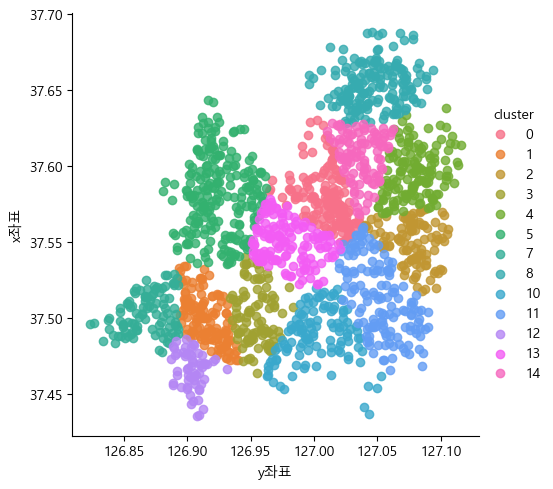

In [706]:
train = train.reset_index(drop=True)
result = pd.concat([train[['x좌표', 'y좌표']], df_scaled], axis=1)
result['cluster'] = kmeans.predict(result[['x좌표' ,'y좌표']])
drop_result = result[(result['cluster']!=9)&(result['cluster']!=6)]
sns.lmplot(data=drop_result, x='y좌표', y='x좌표', hue='cluster', fit_reg=False)

### 최적의 위치 좌표

In [707]:
# 서울의 중심을 기준으로 지도를 생성합니다.
map_osm = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

choropleth_layer = folium.Choropleth( geo_data=dong_geo, data=dong_population, columns=('동별', '인원수'), 
                   key_on='feature.properties.동', 
                   fill_color='YlGnBu', 
                   legend_name='외국인 거주 수', fill_opacity=0.7).add_to(map_osm)
region_data = dong_population.set_index('동별')
region_data = region_data.astype('object')
# geojson내에 인원수 정보 추가 후 툴팁 추가 (채)
for feature in choropleth_layer.geojson.data['features']:
    feature['properties']['인원수'] = region_data.loc[feature['properties']['동'], '인원수']
folium.GeoJsonTooltip(['구','동', '인원수']).add_to(choropleth_layer.geojson)
folium.LayerControl().add_to(map_osm)

""" # 서울 지하철 노선 위치 현황
for station_name, coordinates in subway.items():
    folium.CircleMarker(location=coordinates, popup=station_name, radius=2, color='blue', opacity=0.7).add_to(choropleth_layer) """

# 각 좌표를 지도에 표시합니다.
for point in optimal.values:
    folium.Marker(point).add_to(map_osm)
map_osm
